In [1]:
from ipywidgets import *

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, norm, binom, gamma, beta

# Lab 01: Probability Theory Basics

Welcome to the first lab. For this course, all labs will be given in the form of a Jupyter notebook, as there will be a lot of exercises involving writing code or exploring plots. Some questions are meant to be solved on paper, which is indicated by the fact that they do not contain any code block.

These notebooks were created using Python 3.12, so make sure that your version is not outdated, especially when running into errors. Also, make sure to open them with Jupyter notebook, not JupyterLab, because the interactive plots won't load with the latter!

## Part 1: From Bernoulli to binomial distribution

The **Bernoulli distribution** is a distribution over binary values $x \in \{0,1\}$. For a given parameter $\theta \in [0,1]$, it is defined as $$p(x) = \theta^x (1 − \theta)^{1−x}.$$

In [2]:
class Bernoulli:
    
    def __init__(self, theta):
        self.theta = theta

    def draw(self):
        p = np.random.rand(1).item()
        return 1 if p < self.theta else 0

    def mean(self):
        # TODO (Question 1): Return mean
        return self.theta

    def variance(self):
        # TODO (Question 1): Return variance
        return self.theta * (1 - self.theta)

### Question 1
Compute the mean and variance of $\text{Bernoulli}(\theta)$ on paper. Enter the result into the corresponding function bodies of the `Bernoulli` class above.

### Question 2
Draw a Bernoulli-distributed random variable $N$ times. What is the observed proportion of $1$ s? Plot the evolution of this proportion with $N$. Was this observation predictable? Try it for different values of $\theta$.

[1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 

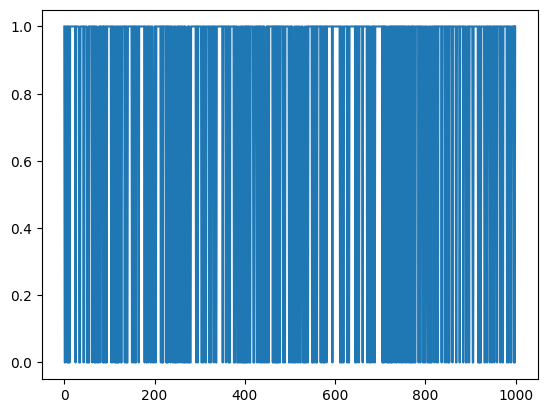

In [3]:
np.random.seed(42)

# TODO: Question 2
def bernoulli_experiment(N):
    bernoulli = Bernoulli(theta=0.7)
    results = []
    for _ in range(N):
        results.append(bernoulli.draw())
    return results

distribution = bernoulli_experiment(1000)
print(distribution)
print("Mean:", np.mean(distribution))
print("Variance:", np.var(distribution))
plt.figure()
plt.plot(distribution)
plt.show()

You can render plots with the `matplotlib` library. To make simple line plots, give two lists of the same length to the `plt.plot(...)` function. It will plot the values of the second list as a function of the values of the first list. Try to the understand the example below and then modify it to plot the proportion of $1$s.

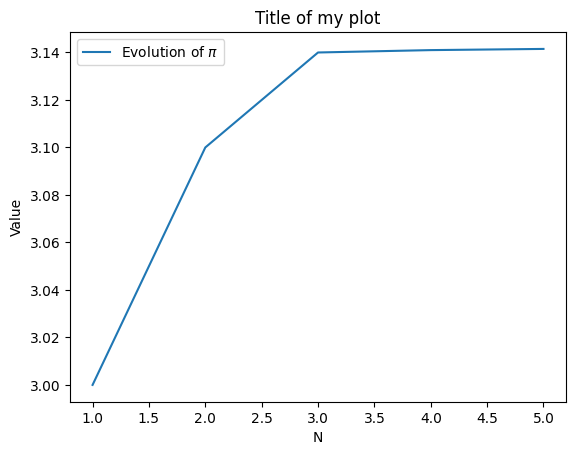

In [4]:
plt.figure()
plt.title("Title of my plot")
plt.xlabel("N")
plt.ylabel("Value")
plt.plot([1, 2, 3, 4, 5], [3, 3.1, 3.14, 3.141, 3.1415], label="Evolution of $\\pi$")  # You can use LaTeX in the labels
plt.legend()  # Displays a legend. This is useful when plotting multiple lines in the same figure
plt.show()

### Question 3
Computers are inherently unable to generate random numbers. To do so, they use pseudo-random generators, which are instantiated using an integer, called a **seed**. Using the same pseudo-random generator and the same seed, the results will be fully deterministic. In the previous question, we used the seed 42, and the results depend on this very specific seed. Maybe we were just lucky with this choice.

When an empirical result depends on some random factors (typically random initialization, random parameters etc), it is important to check that the result does not depend on the choice of the seed only. The empirical way of doing this consists in repeating the observation multiple times with various seeds.

Repeat $K=20$ times the experiment of question 2. Plot the evolution of the proportion of $1$ s with $N$, showing the mean and variance. To make things easier, we have provided a function to do the plotting for you, called `plot_with_variance`. All you need to give it is a list of lists containing the 20 results.

In [5]:
def plot_with_variance(results):
    assert len(set([len(x) for x in results])) <= 1, "Lists must be of equal length"
    arr = np.array(results)
    k, N = arr.shape
    mu = arr.mean(axis=0)
    sigma = arr.std(axis=0)
    N_domain = list(range(1, N+1))
    #plt.figure()
    ax = plt.figure().gca()
    plt.xlabel("N")
    plt.ylabel("Proportion of 1s")
    line_mean, = plt.plot(N_domain, mu, "b-", label="$\\mu$")
    fill_std = plt.fill_between(N_domain, mu - sigma, mu + sigma, color="b", alpha=0.2, label="$\\sigma$")
    plt.legend()
    plt.show()

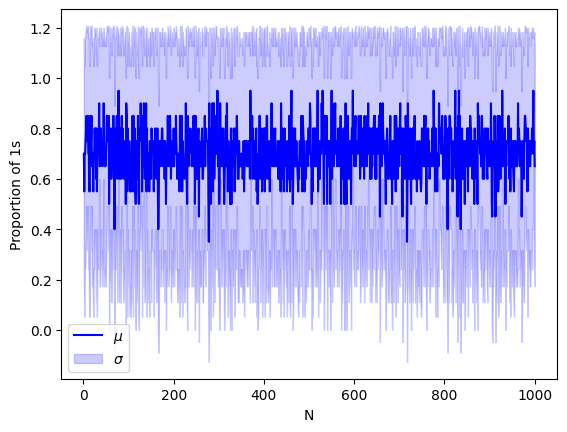

In [6]:
results = []

for i in range(20):
	np.random.seed(i)
# TODO: Your code here
	results.append(bernoulli_experiment(1000))

plot_with_variance(results)

## Part 2: Exploration of Common Distributions

### Question 4
In this section, you can plot the probability density function of various classical probability distributions for varying parameters. For each of them, observe the influence of the parameters and get familiar with the properties of the distribution.

#### Gaussian distribution
The Gaussian distribution (or normal distribution) is defined on the real numbers $\mathbb R$ and has parameters mean ($\mu$) and variance ($\sigma^2$). It is typically denoted by $\mathcal N(\mu, \sigma^2)$ and its PDF is $$f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\left(\frac{(x - \mu)}{\sigma}\right)^2}.$$
Run the cell below to visualize the PDF and play around with the parameters.

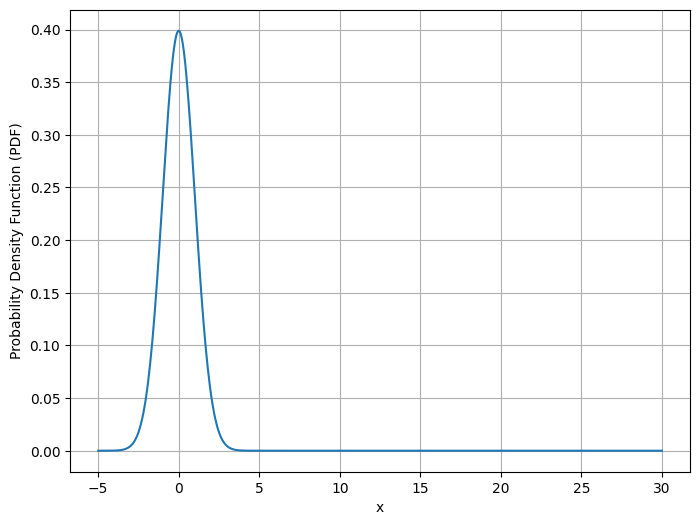

interactive(children=(FloatSlider(value=0.0, description='$\\mu$', max=30.0, min=-5.0), FloatSlider(value=1.0,…

In [9]:
x_gaussian = np.linspace(-5, 30, 500)  # For Gaussian (continuous x values)

fig_gauss = plt.figure(figsize=(8, 6))
mean, std = 0, 1
pdf_values = norm.pdf(x_gaussian, mean, std)
line_gauss, = plt.plot(x_gaussian, pdf_values)
plt.xlabel("x")
plt.ylabel("Probability Density Function (PDF)")
plt.grid(True)
plt.show()

def update_gaussian(mean, std):
    pdf_values = norm.pdf(x_gaussian, mean, std)
    line_gauss.set_ydata(pdf_values)
    fig_gauss.suptitle(f"Gaussian Distribution PDF for μ = {mean:.2f} and σ = {std:.2f}")

interact(update_gaussian, mean=FloatSlider(value=0, min=-5, max=30, description="$\\mu$"), std=FloatSlider(value=1, min=0.05, max=20, description="$\\sigma$"));

#### Poisson Distribution
The Poisson distribution (named after Siméon Denis Poisson) is defined on the natural numbers $\mathbb N$ and has a single parameter $\lambda$, which describes the mean number of occurences in a set time interval. The distribution is typically denoted by $\text{Pois}(\lambda)$. Its PMF is $$p(x = k) = \frac{\lambda^k e^{-\lambda}}{k!}$$
and describes the probability of $k$ events occuring in the time interval.

Run the cell below to visualize the PMF and play around with the parameters.

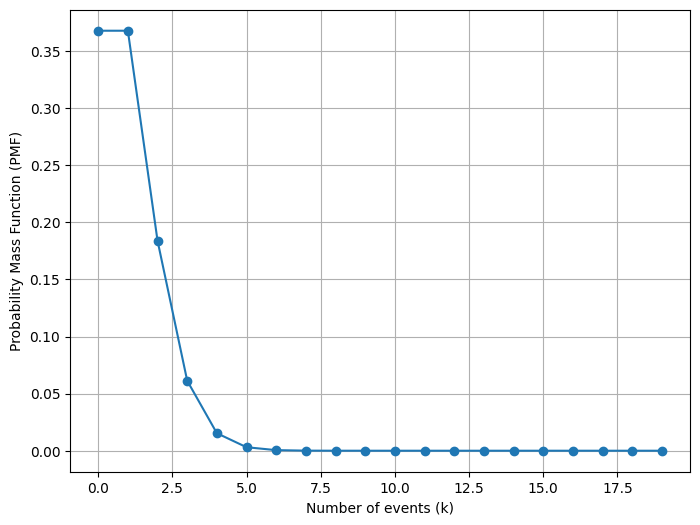

interactive(children=(IntSlider(value=1, description='λ', max=40, min=1), Output()), _dom_classes=('widget-int…

In [27]:
x_poisson = np.arange(0, 20)  # For Poisson (discrete x values)

fig_poisson = plt.figure(figsize=(8, 6))
ax = fig_poisson.add_subplot(1, 1, 1)
pmf_values = poisson.pmf(x_poisson, 1)
line_poisson, = ax.plot(x_poisson, pmf_values, marker='o', linestyle='-')
plt.xlabel("Number of events (k)")
plt.ylabel("Probability Mass Function (PMF)")
plt.grid(True)
plt.show()

def update_poisson(lam):
    pmf_values = poisson.pmf(x_poisson, lam)
    line_poisson.set_ydata(pmf_values)
    fig_poisson.suptitle(f"Poisson Distribution PMF for λ = {lam}")

interact(update_poisson, lam=IntSlider(value=1, min=1, max=40, description='λ'));

Notice how the PMF is largest when $k = \lambda$, as you would expect, but also when $k = \lambda - 1$. Can you see why?

#### Binomial distribution
The Binomial distribution is defined on the natural numbers $\mathbb N$ and has parameters $p \in [0,1]$ and $n \in \mathbb N$. The first denotes the probability of occurence of an event, while the second is the number of trials. The distribution is typically denoted by $B(n,p)$. Its PMF is $$p(x = k) = \binom{n}{k} p^k q^{(n-k)}$$
and describes the probability that an event occuring with probability $p$ occured in exactly $k$ out of $n$ trials. For $n = 1$, we recover the Bernoulli distribution.

Run the cell below to visualize the PMF and play around with the parameters.

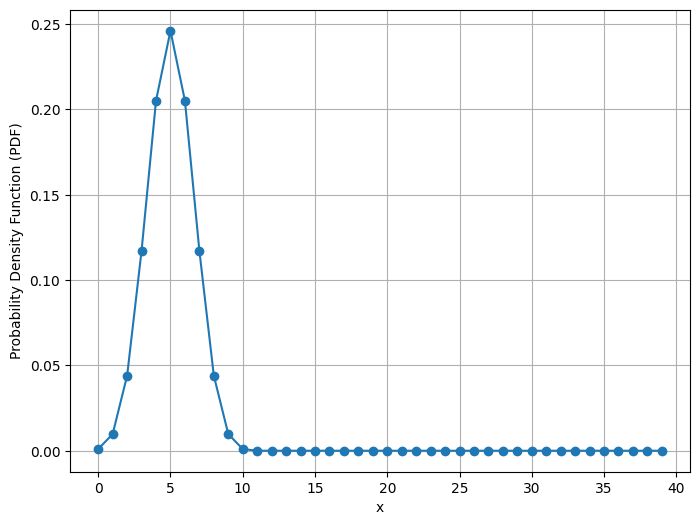

interactive(children=(FloatSlider(value=0.5, description='p', max=1.0), IntSlider(value=10, description='n', m…

In [28]:
x_binom = np.arange(0, 40)

# Plot the binomial distribution in a separate figure
fig_binom = plt.figure(figsize=(8, 6))
p, n = 0.5, 10

pmf_values = binom.pmf(x_binom, n, p)
line_binom, = plt.plot(x_binom, pmf_values, marker='o', linestyle='-')

plt.xlabel("x")
plt.ylabel("Probability Density Function (PDF)")
plt.grid(True)
plt.show()

def update_binom(p, n):
    pmf_values = binom.pmf(x_binom, n, p)
    line_binom.set_ydata(pmf_values)
    fig_binom.suptitle(f"Binomial Distribution PDF for $p$={p} and $n$={n}")
    
interact(update_binom, p = FloatSlider(value=0.5, min=0, max=1), n = IntSlider(value=10, min=1, max=80));

#### Gamma distribution
The Gamma distribution is defined on the positive real numbers $\mathbb R_+ = (0,\infty)$ and has parameters $\alpha, \beta > 0$. These are called shape and rate parameter, respectively. The distribution is typically denoted by $\mathrm{Gamma}(\alpha, \beta)$ and its PDF is $$f(x) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} e^{-\beta x}.$$
Note that $\Gamma(x)$ is the Gamma function, which is an extension of the factorial function to the real (and even complex) numbers. Thus, for all integers $n$, we have $\Gamma(n) = (n-1)!$. However, its properties are not of much interest to us.

Run the cell below to visualize the PDF and play around with the parameters.

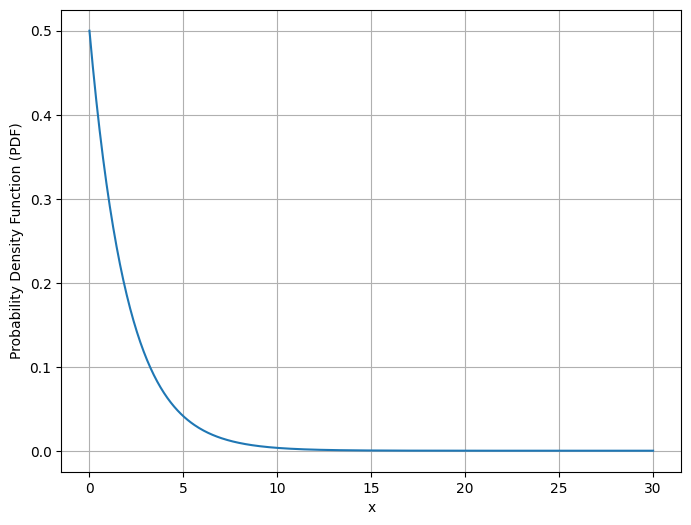

interactive(children=(FloatSlider(value=1.0, description='a', max=10.0, min=1.0), FloatSlider(value=0.5, descr…

In [29]:
x_gamma = np.linspace(0, 30, 500)

# Plot the Gamma distribution in a separate figure
fig_gamma = plt.figure(figsize=(8, 6))
a, b = 1, 0.5
pdf_values = gamma.pdf(x_gamma, a=a, scale=1/b)
lines_gamma, = plt.plot(x_gamma, pdf_values, linestyle='-')
plt.xlabel("x")
plt.ylabel("Probability Density Function (PDF)")
plt.grid(True)
plt.show()

def update_gamma(a, b):
    pdf_values = gamma.pdf(x_gamma, a=a, scale=1/b)
    lines_gamma.set_ydata(pdf_values)
    fig_gamma.suptitle(f"Gamma Distribution PDF for $\\alpha$={a:.2f} and $\\beta$={b:.2f}")

interact(update_gamma, a=FloatSlider(value=1, min=1, max=10), b=FloatSlider(value=0.5, min=0.1, max=5));

#### Beta distribution
The Gamma distribution is defined on $[0,1]$ and has shape parameters $\alpha, \beta > 0$. The distribution is typically denoted by $\mathrm{Beta}(\alpha, \beta)$ and its PDF is $$f(x) = \frac{x^{\alpha-1} (1-x)^{\beta-1}}{\mathrm{B}(\alpha, \beta)}.$$
Here, $\mathrm{B}(\alpha,\beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}$ is called the Beta function and is, once again, just a scaling factor.
The beta distribution can be used to model the uncertainty over probability parameters (such as $p$ in a Bernoulli distribution) in Bayesian inference. Don't worry if this sounds meaningless to you right now. You will learn all of this during the course!

Run the cell below to visualize the PDF and play around with the parameters.

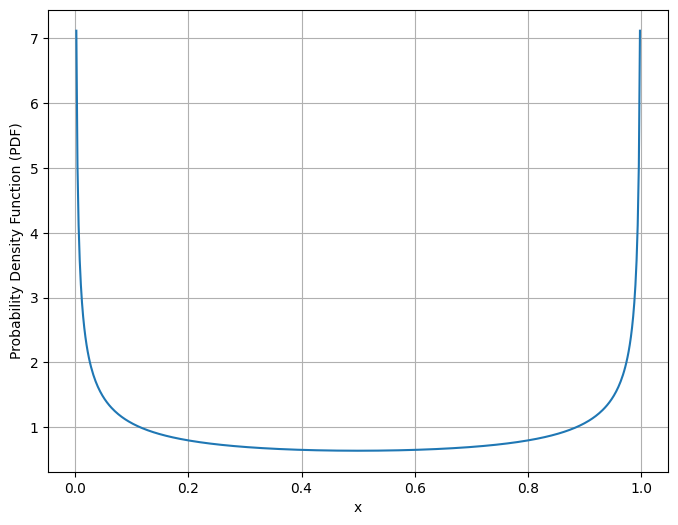

interactive(children=(FloatSlider(value=0.5, description='a', max=10.0, min=0.1), FloatSlider(value=0.5, descr…

In [30]:
x_beta = np.linspace(0, 1, 500)

# Plot the Gamma distribution in a separate figure
fig_beta = plt.figure(figsize=(8, 6))
a, b = 0.5, 0.5
pdf_values = beta.pdf(x_beta, a=a, b=b)
lines_beta, = plt.plot(x_beta, pdf_values, linestyle='-')
plt.xlabel("x")
plt.ylabel("Probability Density Function (PDF)")
plt.grid(True)
plt.show()

def update_beta(a, b):
    pdf_values = beta.pdf(x_beta, a=a, b=b)
    lines_beta.set_ydata(pdf_values)
    fig_beta.suptitle(f"Beta Distribution PDF for $\\alpha$={a:.2f} and $\\beta$={b:.2f}")

interact(update_beta, a=FloatSlider(value=0.5, min=0.1, max=10), b=FloatSlider(value=0.5, min=0.1, max=10));